# Objective: Predict the variable prevalence_of_undernourishment

In [50]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline

# 1) Data Preparation

- Read the data from train datasets
- Merge train values and lables and create train
- read the data from test dataset

In [2]:
train_v = pd.read_csv("train_values.csv")
train_l = pd.read_csv("train_labels.csv")
test = pd.read_csv("test_values.csv")

In [3]:
train_v.head()

,row_id,country_code,year,agricultural_land_area,percentage_of_arable_land_equipped_for_irrigation,cereal_yield,droughts_floods_extreme_temps,forest_area,total_land_area,fertility_rate,...,open_defecation,hiv_incidence,rail_lines_density,access_to_electricity,co2_emissions,unemployment_rate,total_labor_force,military_expenditure_share_gdp,proportion_of_seats_held_by_women_in_gov,political_stability
0,0,889f053,2002,235077.658128,38.558520,935.754365,NaN,5397.737544,537408.312513,5.928981,...,28.933529,0.009975,NaN,52.433239,15485.148165,14.788020,4.350521e+06,7.021072,0.698153,-1.393801
1,1,9e614ab,2012,23000.640738,21.282631,4031.452161,NaN,178336.529912,232013.631676,3.000629,...,29.665789,0.029840,NaN,77.715574,1696.458184,0.687018,3.262614e+06,0.198831,25.101826,0.030556
2,2,100c476,2000,90.954867,4.317080,1581.935278,NaN,101.780566,445.037137,2.301860,...,1.331621,NaN,NaN,91.150981,338.795191,NaN,NaN,NaN,5.395413,0.651586
3,3,4609682,2013,100843.661212,16.636618,1127.626364,NaN,10348.866929,154616.148188,2.199311,...,1.549191,0.010186,1.277096,99.030403,27377.802600,15.948356,3.979141e+06,1.626305,26.735951,-0.928788
4,4,be2a7f5,2008,224.289357,NaN,1418.987212,NaN,460.113424,740.295659,NaN,...,7.564733,NaN,NaN,91.930367,134.258083,NaN,NaN,NaN,19.136813,0.956027


In [4]:
train_l.head()

,row_id,prevalence_of_undernourishment
0,0,31.260713
1,1,18.298233
2,2,39.513397
3,3,4.444016
4,4,4.940301


In [5]:
train_l.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1401 entries, 0 to 1400
Data columns (total 2 columns):
row_id                            1401 non-null int64
prevalence_of_undernourishment    1401 non-null float64
dtypes: float64(1), int64(1)
memory usage: 22.0 KB


In [6]:
train_v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1401 entries, 0 to 1400
Data columns (total 46 columns):
row_id                                               1401 non-null int64
country_code                                         1401 non-null object
year                                                 1401 non-null int64
agricultural_land_area                               1385 non-null float64
percentage_of_arable_land_equipped_for_irrigation    1153 non-null float64
cereal_yield                                         1337 non-null float64
droughts_floods_extreme_temps                        75 non-null float64
forest_area                                          1385 non-null float64
total_land_area                                      1401 non-null float64
fertility_rate                                       1387 non-null float64
life_expectancy                                      1386 non-null float64
rural_population                                     1401 non-null float64


## Train Values
Train data has 46 features (2 integers, 1 object and 43 float features):
    -	row_id                                           
    -	country_code                                     
    -	year               
    -	agricultural_land_area                           
    -	percentage_of_arable_land_equipped_for_irrigation
    -	cereal_yield                                     
    -	droughts_floods_extreme_temps                    
    -	forest_area                                      
    -	total_land_area   
    -	fertility_rate                                   
    -	life_expectancy                                  
    -	rural_population                                 
    -	total_population                                 
    -	urban_population                                 
    -	population_growth                                
    -	avg_value_of_food_production                     
    -	cereal_import_dependency_ratio                   
    -	food_imports_as_share_of_merch_exports           
    -	gross_domestic_product_per_capita_ppp            
    -	imports_of_goods_and_services                    
    -	inequality_index                                 
    -	net_oda_received_percent_gni                     
    -	net_oda_received_per_capita                      
    -	tax_revenue_share_gdp                            
    -	trade_in_services                                
    -	per_capita_food_production_variability           
    -	per_capita_food_supply_variability               
    -	adult_literacy_rate                              
    -	school_enrollment_rate_female                    
    -	school_enrollment_rate_total                     
    -	avg_supply_of_protein_of_animal_origin           
    -	caloric_energy_from_cereals_roots_tubers         
    -	access_to_improved_sanitation                    
    -	access_to_improved_water_sources                 
    -	anemia_prevalence                                
    -	obesity_prevalence                               
    -	open_defecation                                  
    -	hiv_incidence                                    
    -	rail_lines_density                               
    -	access_to_electricity                            
    -	co2_emissions                                    
    -	unemployment_rate                                
    -	total_labor_force                                
    -	military_expenditure_share_gdp                   
    -	proportion_of_seats_held_by_women_in_gov         
    -	political_stability                              

In [7]:
train_v.describe()

,row_id,year,agricultural_land_area,percentage_of_arable_land_equipped_for_irrigation,cereal_yield,droughts_floods_extreme_temps,forest_area,total_land_area,fertility_rate,life_expectancy,...,open_defecation,hiv_incidence,rail_lines_density,access_to_electricity,co2_emissions,unemployment_rate,total_labor_force,military_expenditure_share_gdp,proportion_of_seats_held_by_women_in_gov,political_stability
count,1401.000000,1401.000000,1.385000e+03,1153.000000,1337.000000,75.000000,1.385000e+03,1.401000e+03,1387.000000,1386.000000,...,1381.000000,1030.000000,457.000000,1397.000000,1.317000e+03,1337.000000,1.337000e+03,1128.000000,1258.000000,1266.000000
mean,700.000000,2007.392577,3.539588e+05,27.891446,2753.178229,1.236800,2.329455e+05,8.181146e+05,3.251874,67.114055,...,11.704861,0.218624,1.183129,73.795389,8.304671e+04,8.580335,1.871233e+07,1.919332,15.618462,-0.376020
std,404.578175,4.595501,1.172377e+06,28.577625,2777.815145,1.877823,9.266334e+05,2.792117e+06,1.471044,8.786850,...,15.134440,0.523960,1.175000,31.280311,2.248360e+05,6.645133,6.112347e+07,1.480842,10.324280,0.858888
min,0.000000,2000.000000,2.944179e+00,0.000000,179.258873,0.000000,9.806688e+00,2.018306e+01,0.836053,38.204140,...,0.000000,0.009800,0.000000,0.010012,1.008288e+02,0.491115,3.490659e+04,0.000000,0.000000,-2.781258
25%,350.000000,2003.000000,1.174577e+04,3.490956,1424.503830,0.097420,4.159005e+03,2.507460e+04,2.175432,61.677998,...,0.598210,0.010164,0.297713,51.062336,1.265778e+03,3.748595,9.076810e+05,1.033886,8.575444,-0.948167
50%,700.000000,2007.000000,4.701980e+04,18.846225,2221.920986,0.661379,2.224170e+04,1.309442e+05,2.751553,69.857724,...,4.773481,0.040068,0.608198,89.156218,7.637910e+03,6.633461,3.411048e+06,1.538130,13.093035,-0.287659
75%,1050.000000,2011.000000,2.247874e+05,41.954776,3296.467202,1.318327,1.255963e+05,6.261072e+05,4.227445,73.706476,...,18.580295,0.166766,1.869188,98.708971,4.689573e+04,11.454023,1.117916e+07,2.325482,21.614527,0.200449
max,1400.000000,2015.000000,1.045780e+07,101.906349,27978.265095,9.177338,8.243222e+06,2.403061e+07,7.544631,84.771403,...,66.689556,4.269284,4.867161,101.996650,2.265183e+06,37.977184,4.985771e+08,13.326110,64.773806,1.376322


# 2) Data Processing

These are the steps I'm going to do inorder to process the data:  
    1) Merge train lables and values and create train dataset  
    2) Processing the NULL values  
    3) Check for correlation of features and identify whether we can create any new feature

In [8]:
train = train_v.merge(train_l, on='row_id')
train.head()

,row_id,country_code,year,agricultural_land_area,percentage_of_arable_land_equipped_for_irrigation,cereal_yield,droughts_floods_extreme_temps,forest_area,total_land_area,fertility_rate,...,hiv_incidence,rail_lines_density,access_to_electricity,co2_emissions,unemployment_rate,total_labor_force,military_expenditure_share_gdp,proportion_of_seats_held_by_women_in_gov,political_stability,prevalence_of_undernourishment
0,0,889f053,2002,235077.658128,38.558520,935.754365,NaN,5397.737544,537408.312513,5.928981,...,0.009975,NaN,52.433239,15485.148165,14.788020,4.350521e+06,7.021072,0.698153,-1.393801,31.260713
1,1,9e614ab,2012,23000.640738,21.282631,4031.452161,NaN,178336.529912,232013.631676,3.000629,...,0.029840,NaN,77.715574,1696.458184,0.687018,3.262614e+06,0.198831,25.101826,0.030556,18.298233
2,2,100c476,2000,90.954867,4.317080,1581.935278,NaN,101.780566,445.037137,2.301860,...,NaN,NaN,91.150981,338.795191,NaN,NaN,NaN,5.395413,0.651586,39.513397
3,3,4609682,2013,100843.661212,16.636618,1127.626364,NaN,10348.866929,154616.148188,2.199311,...,0.010186,1.277096,99.030403,27377.802600,15.948356,3.979141e+06,1.626305,26.735951,-0.928788,4.444016
4,4,be2a7f5,2008,224.289357,NaN,1418.987212,NaN,460.113424,740.295659,NaN,...,NaN,NaN,91.930367,134.258083,NaN,NaN,NaN,19.136813,0.956027,4.940301


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1401 entries, 0 to 1400
Data columns (total 47 columns):
row_id                                               1401 non-null int64
country_code                                         1401 non-null object
year                                                 1401 non-null int64
agricultural_land_area                               1385 non-null float64
percentage_of_arable_land_equipped_for_irrigation    1153 non-null float64
cereal_yield                                         1337 non-null float64
droughts_floods_extreme_temps                        75 non-null float64
forest_area                                          1385 non-null float64
total_land_area                                      1401 non-null float64
fertility_rate                                       1387 non-null float64
life_expectancy                                      1386 non-null float64
rural_population                                     1401 non-null float64


In [10]:
train.isnull().sum()[train.isnull().sum()>0]

agricultural_land_area                                 16
percentage_of_arable_land_equipped_for_irrigation     248
cereal_yield                                           64
droughts_floods_extreme_temps                        1326
forest_area                                            16
fertility_rate                                         14
life_expectancy                                        15
population_growth                                       1
avg_value_of_food_production                          167
cereal_import_dependency_ratio                        317
food_imports_as_share_of_merch_exports                253
gross_domestic_product_per_capita_ppp                  39
imports_of_goods_and_services                          77
inequality_index                                      972
net_oda_received_percent_gni                          164
net_oda_received_per_capita                           162
tax_revenue_share_gdp                                 545
trade_in_servi

In [92]:
test.isnull().sum()[test.isnull().sum()>0]

percentage_of_arable_land_equipped_for_irrigation    104
cereal_yield                                          32
droughts_floods_extreme_temps                        582
avg_value_of_food_production                          76
cereal_import_dependency_ratio                       140
food_imports_as_share_of_merch_exports               114
imports_of_goods_and_services                         57
inequality_index                                     477
net_oda_received_percent_gni                          55
net_oda_received_per_capita                           37
tax_revenue_share_gdp                                250
trade_in_services                                     81
per_capita_food_production_variability                38
per_capita_food_supply_variability                    76
adult_literacy_rate                                  509
school_enrollment_rate_female                        230
school_enrollment_rate_total                         207
avg_supply_of_protein_of_animal

In [11]:
len(train.country_code.unique())

92

In [93]:
len(test.country_code.unique())

39

##### There are 92 unique countries and some of the fields have more missind data. My plan is to fill the data with country related mean for the variables that are not frequently null

In [12]:
train.isnull().sum()[(train.isnull().sum()<=92) & (train.isnull().sum()>0)]

agricultural_land_area                    16
cereal_yield                              64
forest_area                               16
fertility_rate                            14
life_expectancy                           15
population_growth                          1
gross_domestic_product_per_capita_ppp     39
imports_of_goods_and_services             77
per_capita_food_production_variability    87
access_to_improved_sanitation             74
access_to_improved_water_sources          62
anemia_prevalence                         80
open_defecation                           20
access_to_electricity                      4
co2_emissions                             84
unemployment_rate                         64
total_labor_force                         64
dtype: int64

In [13]:
keep_cols = ['country_code'] + train.isnull().sum()[(train.isnull().sum()<=92) & (train.isnull().sum()>0)].index.tolist()
keep_cols

['country_code',
 'agricultural_land_area',
 'cereal_yield',
 'forest_area',
 'fertility_rate',
 'life_expectancy',
 'population_growth',
 'gross_domestic_product_per_capita_ppp',
 'imports_of_goods_and_services',
 'per_capita_food_production_variability',
 'access_to_improved_sanitation',
 'access_to_improved_water_sources',
 'anemia_prevalence',
 'open_defecation',
 'access_to_electricity',
 'co2_emissions',
 'unemployment_rate',
 'total_labor_force']

In [111]:
len(keep_cols)

18

In [15]:
train_country_group = train.groupby(['country_code'], as_index=False).mean()
train_country_group.head()

,country_code,row_id,year,agricultural_land_area,percentage_of_arable_land_equipped_for_irrigation,cereal_yield,droughts_floods_extreme_temps,forest_area,total_land_area,fertility_rate,...,hiv_incidence,rail_lines_density,access_to_electricity,co2_emissions,unemployment_rate,total_labor_force,military_expenditure_share_gdp,proportion_of_seats_held_by_women_in_gov,political_stability,prevalence_of_undernourishment
0,04952a0,743.875000,2007.5,7.144641e+05,0.850216,1391.630219,0.054877,1.002863e+05,9.070130e+05,5.907753,...,0.299848,0.399313,49.813785,94138.143455,4.191385,4.629322e+07,0.720023,5.808270,-1.912437,7.217049
1,0593aa0,757.687500,2007.5,9.148654e+01,46.613637,1007.198543,NaN,1.702740e+02,3.406071e+02,2.306288,...,NaN,NaN,89.190758,236.522009,NaN,NaN,NaN,23.753714,0.590482,27.173595
2,066b021,663.500000,2007.5,4.694898e+04,96.805930,2425.675997,5.373879,4.081741e+03,1.399424e+05,3.547393,...,0.031311,0.401402,99.598016,2745.465908,11.096102,2.690555e+06,1.355042,16.576392,-1.096097,38.380108
3,07f62b0,727.444444,2004.0,2.690056e+06,6.485358,3185.878171,NaN,5.086568e+06,8.388364e+06,2.036612,...,0.039896,0.319576,97.219606,343167.248279,9.628714,8.811613e+07,1.616182,7.972180,-0.124912,6.433697
4,07f8d11,822.125000,2007.5,2.541267e+04,53.763211,3612.883320,2.202163,2.114759e+04,6.283127e+04,2.210686,...,0.009961,2.216594,81.891059,12983.853131,6.172976,8.212805e+06,3.068605,5.283052,-1.031526,26.972231


In [112]:
test_country_group = test.groupby(['country_code'], as_index=False).mean()
test_country_group.head()

,country_code,row_id,year,agricultural_land_area,percentage_of_arable_land_equipped_for_irrigation,cereal_yield,droughts_floods_extreme_temps,forest_area,total_land_area,fertility_rate,...,open_defecation,hiv_incidence,rail_lines_density,access_to_electricity,co2_emissions,unemployment_rate,total_labor_force,military_expenditure_share_gdp,proportion_of_seats_held_by_women_in_gov,political_stability
0,0c2cb01,305.4375,2007.5,5.290481e+04,8.868648,2690.787948,6.591165,1.046139e+05,1.757508e+05,3.089092,...,61.525425,0.041969,0.327161,30.765146,3.781025e+03,1.069661,7.522313e+06,1.464527,15.119723,-0.418078
1,1043682,247.4375,2007.5,5.170843e+06,56.942251,5376.001451,7.923248,1.951060e+06,9.380870e+06,1.583715,...,2.005644,NaN,0.663768,98.497085,7.000058e+06,4.346587,7.706570e+08,1.973517,21.506378,NaN
2,14ad63a,322.6875,2007.5,2.495594e+04,13.283334,2593.888405,0.337711,3.733639e+03,3.278818e+04,1.268561,...,0.067850,0.043600,3.390447,99.105430,4.596524e+03,6.334762,1.340733e+06,0.405250,18.153858,-0.269305
3,1672f60,266.3125,2007.5,2.590485e+05,0.646786,463.981247,0.730161,1.166168e+05,5.676343e+05,2.963733,...,18.829347,1.670745,0.200797,42.552831,4.359195e+03,18.644300,8.305169e+05,2.959890,11.420084,0.986959
4,1af00b8,303.0625,2007.5,1.152489e+04,58.309153,4011.859336,5.230543,7.754176e+03,2.741068e+04,1.787006,...,0.510641,0.009989,1.546823,100.340355,4.318229e+03,16.982859,1.286284e+06,1.456620,11.234609,-0.190173


In [113]:
train_country_keep = train_country_group[keep_cols]
train_country_keep.head()

,country_code,agricultural_land_area,cereal_yield,forest_area,fertility_rate,life_expectancy,population_growth,gross_domestic_product_per_capita_ppp,imports_of_goods_and_services,per_capita_food_production_variability,access_to_improved_sanitation,access_to_improved_water_sources,anemia_prevalence,open_defecation,access_to_electricity,co2_emissions,unemployment_rate,total_labor_force
0,04952a0,7.144641e+05,1391.630219,1.002863e+05,5.907753,49.696190,2.604761,4436.719760,22.151271,8.130910,31.332331,60.590803,51.479156,24.113462,49.813785,94138.143455,4.191385,4.629322e+07
1,0593aa0,9.148654e+01,1007.198543,1.702740e+02,2.306288,71.883641,0.323561,11103.342407,53.586190,13.473277,98.452110,96.632101,25.112694,2.570272,89.190758,236.522009,NaN,NaN
2,066b021,4.694898e+04,2425.675997,4.081741e+03,3.547393,68.262308,2.095922,1916.549570,65.153197,6.026403,92.962604,66.963287,33.252772,0.685492,99.598016,2745.465908,11.096102,2.690555e+06
3,07f62b0,2.690056e+06,3185.878171,5.086568e+06,2.036612,71.445437,1.226435,12266.934251,12.856722,9.500206,77.413032,94.761093,27.911751,6.867556,97.219606,343167.248279,9.628714,8.811613e+07
4,07f8d11,2.541267e+04,3612.883320,2.114759e+04,2.210686,74.087531,0.725313,7810.043375,36.612681,3.531513,88.862022,88.097991,31.617913,2.499299,81.891059,12983.853131,6.172976,8.212805e+06


In [114]:
test_country_keep = test_country_group[keep_cols]
test_country_keep.head()

,country_code,agricultural_land_area,cereal_yield,forest_area,fertility_rate,life_expectancy,population_growth,gross_domestic_product_per_capita_ppp,imports_of_goods_and_services,per_capita_food_production_variability,access_to_improved_sanitation,access_to_improved_water_sources,anemia_prevalence,open_defecation,access_to_electricity,co2_emissions,unemployment_rate,total_labor_force
0,0c2cb01,5.290481e+04,2690.787948,1.046139e+05,3.089092,64.350211,1.664522,2276.907283,65.461615,8.874491,29.441855,58.449841,48.729268,61.525425,30.765146,3.781025e+03,1.069661,7.522313e+06
1,1043682,5.170843e+06,5376.001451,1.951060e+06,1.583715,74.795220,0.566116,8211.789065,23.166940,2.986171,67.858908,88.492495,NaN,2.005644,98.497085,7.000058e+06,4.346587,7.706570e+08
2,14ad63a,2.495594e+04,2593.888405,3.733639e+03,1.268561,68.798506,-0.161643,3599.294503,82.750294,31.670162,74.393256,87.111418,26.439435,0.067850,99.105430,4.596524e+03,6.334762,1.340733e+06
3,1672f60,2.590485e+05,463.981247,1.166168e+05,2.963733,56.435634,1.648347,12915.347027,46.313724,7.747744,58.298541,96.114556,31.634221,18.829347,42.552831,4.359195e+03,18.644300,8.305169e+05
4,1af00b8,1.152489e+04,4011.859336,7.754176e+03,1.787006,75.608940,-0.477451,8534.085292,47.060155,7.120704,88.743226,95.305282,23.308307,0.510641,100.340355,4.318229e+03,16.982859,1.286284e+06


In [17]:
train.loc[:, 'percentage_of_arable_land_equipped_for_irrigation'][(train.country_code == '0593aa0') & (train.percentage_of_arable_land_equipped_for_irrigation.isnull())]

616   NaN
889   NaN
Name: percentage_of_arable_land_equipped_for_irrigation, dtype: float64

In [18]:
train_country_group.loc[:,'percentage_of_arable_land_equipped_for_irrigation'][train.country_code == '0593aa0']

40    4.679796
Name: percentage_of_arable_land_equipped_for_irrigation, dtype: float64

train.loc[:, 'percentage_of_arable_land_equipped_for_irrigation'][(train.country_code == '0593aa0') & (train.percentage_of_arable_land_equipped_for_irrigation.isnull())] = train_country_group.loc[:,'percentage_of_arable_land_equipped_for_irrigation'][train.country_code == '0593aa0']

In [68]:
train_merge = pd.merge(train, train_country_keep, on='country_code')

In [69]:
train_merge.shape

(1401, 64)

In [115]:
test_merge = pd.merge(test, test_country_keep, on='country_code')

In [116]:
test_merge.shape

(616, 63)

In [70]:
train_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1401 entries, 0 to 1400
Data columns (total 64 columns):
row_id                                               1401 non-null int64
country_code                                         1401 non-null object
year                                                 1401 non-null int64
agricultural_land_area_x                             1385 non-null float64
percentage_of_arable_land_equipped_for_irrigation    1153 non-null float64
cereal_yield_x                                       1337 non-null float64
droughts_floods_extreme_temps                        75 non-null float64
forest_area_x                                        1385 non-null float64
total_land_area                                      1401 non-null float64
fertility_rate_x                                     1387 non-null float64
life_expectancy_x                                    1386 non-null float64
rural_population                                     1401 non-null float64


In [71]:
train.loc[:, 'per_capita_food_production_variability'][(train.country_code == '0593aa0') & (train.per_capita_food_production_variability.isnull())]

889   NaN
Name: per_capita_food_production_variability, dtype: float64

In [72]:
train_merge[['country_code', 'per_capita_food_production_variability_x', 'per_capita_food_production_variability_y']][train_merge.country_code == '0593aa0']

,country_code,per_capita_food_production_variability_x,per_capita_food_production_variability_y
557,0593aa0,6.746738,13.473277
558,0593aa0,25.854793,13.473277
559,0593aa0,27.861291,13.473277
560,0593aa0,6.564374,13.473277
561,0593aa0,13.218144,13.473277
562,0593aa0,3.157426,13.473277
563,0593aa0,4.770667,13.473277
564,0593aa0,5.426001,13.473277
565,0593aa0,9.746840,13.473277
566,0593aa0,NaN,13.473277


In [73]:
colsx = ['agricultural_land_area_x',
 'cereal_yield_x',
 'forest_area_x',
 'fertility_rate_x',
 'life_expectancy_x',
 'population_growth_x',
 'gross_domestic_product_per_capita_ppp_x',
 'imports_of_goods_and_services_x',
 'per_capita_food_production_variability_x',
 'access_to_improved_sanitation_x',
 'access_to_improved_water_sources_x',
 'anemia_prevalence_x',
 'open_defecation_x',
 'access_to_electricity_x',
 'co2_emissions_x',
 'unemployment_rate_x',
 'total_labor_force_x']

colsy = ['agricultural_land_area_y',
 'cereal_yield_y',
 'forest_area_y',
 'fertility_rate_y',
 'life_expectancy_y',
 'population_growth_y',
 'gross_domestic_product_per_capita_ppp_y',
 'imports_of_goods_and_services_y',
 'per_capita_food_production_variability_y',
 'access_to_improved_sanitation_y',
 'access_to_improved_water_sources_y',
 'anemia_prevalence_y',
 'open_defecation_y',
 'access_to_electricity_y',
 'co2_emissions_y',
 'unemployment_rate_y',
 'total_labor_force_y']
len(colsx), len(colsy)

(17, 17)

In [74]:
for i in range(len(colsx)-1):
    print(colsx[i])
    train_merge[colsx[i]] = train_merge.apply(lambda x: x[colsx[i]] if x[colsx[i]] == x[colsx[i]] else x[colsy[i]], axis=1)

agricultural_land_area_x
cereal_yield_x
forest_area_x
fertility_rate_x
life_expectancy_x
population_growth_x
gross_domestic_product_per_capita_ppp_x
imports_of_goods_and_services_x
per_capita_food_production_variability_x
access_to_improved_sanitation_x
access_to_improved_water_sources_x
anemia_prevalence_x
open_defecation_x
access_to_electricity_x
co2_emissions_x
unemployment_rate_x


In [117]:
for i in range(len(colsx)-1):
    print(colsx[i])
    test_merge[colsx[i]] = test_merge.apply(lambda x: x[colsx[i]] if x[colsx[i]] == x[colsx[i]] else x[colsy[i]], axis=1)

agricultural_land_area_x
cereal_yield_x
forest_area_x
fertility_rate_x
life_expectancy_x
population_growth_x
gross_domestic_product_per_capita_ppp_x
imports_of_goods_and_services_x
per_capita_food_production_variability_x
access_to_improved_sanitation_x
access_to_improved_water_sources_x
anemia_prevalence_x
open_defecation_x
access_to_electricity_x
co2_emissions_x
unemployment_rate_x


In [75]:
train_merge[['country_code', 'per_capita_food_production_variability_x', 'per_capita_food_production_variability_y']][train_merge.country_code == '0593aa0']

,country_code,per_capita_food_production_variability_x,per_capita_food_production_variability_y
557,0593aa0,6.746738,13.473277
558,0593aa0,25.854793,13.473277
559,0593aa0,27.861291,13.473277
560,0593aa0,6.564374,13.473277
561,0593aa0,13.218144,13.473277
562,0593aa0,3.157426,13.473277
563,0593aa0,4.770667,13.473277
564,0593aa0,5.426001,13.473277
565,0593aa0,9.746840,13.473277
566,0593aa0,13.473277,13.473277


In [76]:
train_merge.isnull().sum()[(train_merge.isnull().sum()<=92) & (train_merge.isnull().sum()>0)].index

Index(['agricultural_land_area_x', 'cereal_yield_x', 'forest_area_x',
       'gross_domestic_product_per_capita_ppp_x',
       'imports_of_goods_and_services_x', 'access_to_improved_sanitation_x',
       'access_to_improved_water_sources_x', 'anemia_prevalence_x',
       'open_defecation_x', 'unemployment_rate_x', 'total_labor_force_x',
       'agricultural_land_area_y', 'cereal_yield_y', 'forest_area_y',
       'gross_domestic_product_per_capita_ppp_y',
       'imports_of_goods_and_services_y', 'access_to_improved_sanitation_y',
       'access_to_improved_water_sources_y', 'anemia_prevalence_y',
       'open_defecation_y', 'unemployment_rate_y', 'total_labor_force_y'],
      dtype='object')

##### Now drop off all _y columns and rename _x to no _x

In [77]:
train_merge.drop(['agricultural_land_area_y', 'cereal_yield_y', 'forest_area_y',
       'gross_domestic_product_per_capita_ppp_y',
       'imports_of_goods_and_services_y', 'access_to_improved_sanitation_y',
       'access_to_improved_water_sources_y', 'anemia_prevalence_y',
       'open_defecation_y', 'unemployment_rate_y', 'total_labor_force_y'], axis=1, inplace=True)

In [118]:
test_merge.drop(['agricultural_land_area_y', 'cereal_yield_y', 'forest_area_y',
       'gross_domestic_product_per_capita_ppp_y',
       'imports_of_goods_and_services_y', 'access_to_improved_sanitation_y',
       'access_to_improved_water_sources_y', 'anemia_prevalence_y',
       'open_defecation_y', 'unemployment_rate_y', 'total_labor_force_y'], axis=1, inplace=True)

In [78]:
train_merge.isnull().sum()[(train_merge.isnull().sum()==0)].index

Index(['row_id', 'country_code', 'year', 'total_land_area', 'fertility_rate_x',
       'life_expectancy_x', 'rural_population', 'total_population',
       'urban_population', 'population_growth_x',
       'per_capita_food_production_variability_x', 'access_to_electricity_x',
       'co2_emissions_x', 'prevalence_of_undernourishment', 'fertility_rate_y',
       'life_expectancy_y', 'population_growth_y',
       'per_capita_food_production_variability_y', 'access_to_electricity_y',
       'co2_emissions_y'],
      dtype='object')

In [79]:
train_merge.drop(['fertility_rate_y', 'life_expectancy_y', 'population_growth_y',
       'per_capita_food_production_variability_y', 'access_to_electricity_y', 
       'co2_emissions_y'], axis=1, inplace=True)

In [119]:
test_merge.drop(['fertility_rate_y', 'life_expectancy_y', 'population_growth_y',
       'per_capita_food_production_variability_y', 'access_to_electricity_y', 
       'co2_emissions_y'], axis=1, inplace=True)

In [80]:
train_merge.isnull().sum()

row_id                                                  0
country_code                                            0
year                                                    0
agricultural_land_area_x                               16
percentage_of_arable_land_equipped_for_irrigation     248
cereal_yield_x                                         64
droughts_floods_extreme_temps                        1326
forest_area_x                                          16
total_land_area                                         0
fertility_rate_x                                        0
life_expectancy_x                                       0
rural_population                                        0
total_population                                        0
urban_population                                        0
population_growth_x                                     0
avg_value_of_food_production                          167
cereal_import_dependency_ratio                        317
food_imports_a

In [81]:
x_cols = [col for col in train_merge.columns if '_x' in col]
print(x_cols)

['agricultural_land_area_x', 'cereal_yield_x', 'forest_area_x', 'fertility_rate_x', 'life_expectancy_x', 'population_growth_x', 'gross_domestic_product_per_capita_ppp_x', 'imports_of_goods_and_services_x', 'per_capita_food_production_variability_x', 'access_to_improved_sanitation_x', 'access_to_improved_water_sources_x', 'anemia_prevalence_x', 'open_defecation_x', 'access_to_electricity_x', 'co2_emissions_x', 'unemployment_rate_x', 'total_labor_force_x']


In [88]:
for i in range(0,len(x_cols)):
    train_merge.rename(columns = {x_cols[i] : re.sub('_x', '',x_cols[i])}, inplace=True)

In [120]:
for i in range(0,len(x_cols)):
    test_merge.rename(columns = {x_cols[i] : re.sub('_x', '',x_cols[i])}, inplace=True)

In [89]:
train_merge.isnull().sum()

row_id                                                  0
country_code                                            0
year                                                    0
agricultural_land_area                                 16
percentage_of_arable_land_equipped_for_irrigation     248
cereal_yield                                           64
droughts_floods_extreme_temps                        1326
forest_area                                            16
total_land_area                                         0
fertility_rate                                          0
life_expectancy                                         0
rural_population                                        0
total_population                                        0
urban_population                                        0
population_growth                                       0
avg_value_of_food_production                          167
cereal_import_dependency_ratio                        317
food_imports_a

In [121]:
test_merge.isnull().sum()

row_id                                                 0
country_code                                           0
year                                                   0
agricultural_land_area                                 0
percentage_of_arable_land_equipped_for_irrigation    104
cereal_yield                                          32
droughts_floods_extreme_temps                        582
forest_area                                            0
total_land_area                                        0
fertility_rate                                         0
life_expectancy                                        0
rural_population                                       0
total_population                                       0
urban_population                                       0
population_growth                                      0
avg_value_of_food_production                          76
cereal_import_dependency_ratio                       140
food_imports_as_share_of_merch_

In [86]:
train_merge.head()

,row_id,country_code,year,agricultural_land_area,percentage_of_arable_land_equipped_for_irrigation,cereal_yield,droughts_floods_extreme_temps,forest_area,total_land_area,fertility_rate,...,hiv_incidence,rail_lines_density,access_to_electricity,co2_emissions,unemployment_rate,total_labor_force,military_expenditure_share_gdp,proportion_of_seats_held_by_women_in_gov,political_stability,prevalence_of_undernourishment
0,0,889f053,2002,235077.658128,38.558520,935.754365,NaN,5397.737544,537408.312513,5.928981,...,0.009975,NaN,52.433239,15485.148165,14.788020,4.350521e+06,7.021072,0.698153,-1.393801,31.260713
1,107,889f053,2000,238889.309650,32.172735,1105.943665,NaN,5410.890935,528021.974965,6.319679,...,0.010086,NaN,50.617507,14481.940665,12.828682,4.296644e+06,4.973770,0.709801,-1.247080,29.955372
2,159,889f053,2005,232711.599108,50.326653,709.317439,NaN,5401.683690,523095.724214,5.513551,...,0.010027,NaN,55.903152,19948.231182,16.056943,4.656077e+06,4.871880,0.297101,-1.447150,30.598456
3,316,889f053,2003,233024.496951,43.998642,771.615922,NaN,5516.782480,532875.386108,5.705698,...,0.010026,NaN,53.620719,17615.713352,15.849842,4.471066e+06,6.745127,0.305010,-1.508562,31.179125
4,362,889f053,2009,234959.016963,55.269463,991.542121,0.098596,5457.803706,527637.164439,4.787286,...,0.009868,NaN,62.752541,24075.616797,14.629417,5.327447e+06,5.596004,0.303312,-2.339758,26.040441


In [122]:
train_merge = train_merge.fillna(0)
test_merge = test_merge.fillna(0)

In [124]:
train.isnull().sum()[train.isnull().sum()>0]

Series([], dtype: int64)

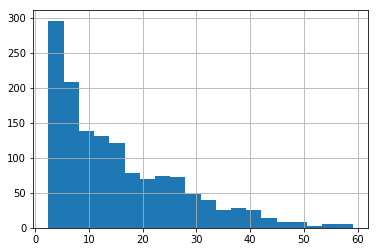

In [125]:
train.prevalence_of_undernourishment.hist(bins=20)

In [126]:
train.prevalence_of_undernourishment[train.year == 2000].mean()

19.06656043235447

In [127]:
train.prevalence_of_undernourishment[train.year == 2010].mean()

13.906598121870827

In [129]:
train = train_merge
test = test_merge

In [128]:
# Importing modules
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import linear_model

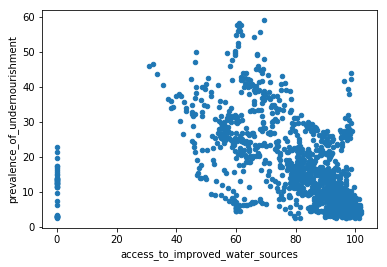

In [130]:
train.plot(x='access_to_improved_water_sources', y='prevalence_of_undernourishment', kind='scatter')

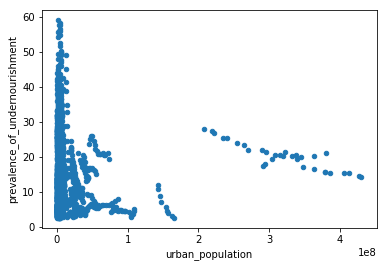

In [131]:
train.plot(x='urban_population', y='prevalence_of_undernourishment', kind='scatter')

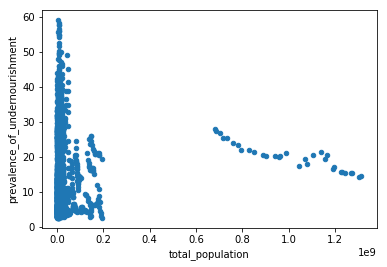

In [132]:
train.plot(x='total_population', y='prevalence_of_undernourishment', kind='scatter')

In [133]:
train_corr = train.corr()

In [134]:
train_corr['prevalence_of_undernourishment'].sort_values()

access_to_electricity                               -0.634720
access_to_improved_sanitation                       -0.491791
obesity_prevalence                                  -0.484645
life_expectancy                                     -0.480750
access_to_improved_water_sources                    -0.435148
avg_supply_of_protein_of_animal_origin              -0.355678
political_stability                                 -0.322143
gross_domestic_product_per_capita_ppp               -0.317602
avg_value_of_food_production                        -0.299551
rail_lines_density                                  -0.252071
per_capita_food_production_variability              -0.246248
school_enrollment_rate_total                        -0.222744
cereal_yield                                        -0.215123
unemployment_rate                                   -0.198395
tax_revenue_share_gdp                               -0.196756
school_enrollment_rate_female                       -0.170280
year    

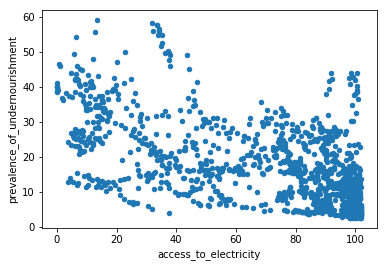

In [135]:
train.plot(x='access_to_electricity', y='prevalence_of_undernourishment', kind='scatter')

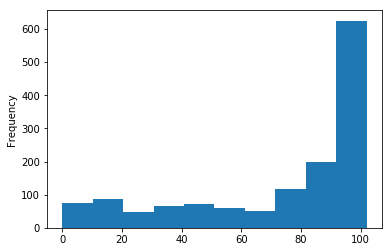

In [136]:
train.access_to_electricity.plot.hist()

In [137]:
train.year.describe()

count    1401.000000
mean     2007.392577
std         4.595501
min      2000.000000
25%      2003.000000
50%      2007.000000
75%      2011.000000
max      2015.000000
Name: year, dtype: float64

In [138]:
train[train.country_code == 'f196e55']

,row_id,country_code,year,agricultural_land_area,percentage_of_arable_land_equipped_for_irrigation,cereal_yield,droughts_floods_extreme_temps,forest_area,total_land_area,fertility_rate,...,hiv_incidence,rail_lines_density,access_to_electricity,co2_emissions,unemployment_rate,total_labor_force,military_expenditure_share_gdp,proportion_of_seats_held_by_women_in_gov,political_stability,prevalence_of_undernourishment
1093,116,f196e55,2007,112.946925,38.187831,732.705699,0.0,3788.305559,5322.568675,1.794842,...,0.0,0.0,98.962279,8461.464228,6.058630,180752.756418,2.681420,0.0,1.152641,2.714942
1094,229,f196e55,2008,112.059390,30.160844,691.027862,0.0,3820.403558,5171.245008,1.838301,...,0.0,0.0,100.492175,8992.912926,6.099074,185744.999228,2.523089,0.0,1.169970,2.999692
1095,335,f196e55,2013,145.960081,21.551312,975.168435,0.0,3821.259467,5243.760907,1.891168,...,0.0,0.0,98.051113,7761.694908,5.949164,210661.302747,2.316790,0.0,1.096785,2.650630
1096,381,f196e55,2000,99.783114,50.203340,648.732024,0.0,3928.731975,5342.742878,2.255555,...,0.0,0.0,100.439728,4688.503837,5.602986,158993.622112,4.114262,0.0,1.247945,3.041409
1097,773,f196e55,2012,136.300091,22.965675,980.578579,0.0,3827.860789,5363.556465,1.882940,...,0.0,0.0,98.561606,9552.766496,6.027889,206385.386605,2.162910,0.0,0.937484,2.781669
1098,863,f196e55,2001,110.226745,50.911623,720.993072,0.0,3961.899104,5280.004836,2.157056,...,0.0,0.0,100.445788,4428.818758,5.814237,161685.567406,3.917324,0.0,0.000000,2.812526
1099,952,f196e55,2009,133.462409,27.511221,511.676582,0.0,3862.987943,5270.667990,1.813273,...,0.0,0.0,100.007225,7762.048476,6.121148,191203.825893,3.196084,0.0,1.350364,3.219674
1100,1128,f196e55,2014,143.902804,0.000000,831.565145,0.0,3849.791483,5370.812235,1.891877,...,0.0,0.0,98.349730,9289.531947,6.895046,213428.673440,3.043673,0.0,1.254954,2.538720
1101,1152,f196e55,2011,136.042706,25.458298,940.492784,0.0,3741.495498,5243.236465,1.874982,...,0.0,0.0,99.972618,9634.723942,6.029963,198940.168800,2.281452,0.0,1.071496,2.959181
1102,1359,f196e55,2010,135.850581,25.106177,571.285671,0.0,3838.445635,5357.031880,1.832529,...,0.0,0.0,100.564009,8341.821353,6.122639,190638.087120,2.904293,0.0,1.243211,3.175559


In [139]:
train.prevalence_of_undernourishment[train.year == 2014].mean()

13.581782301418798

In [140]:
train.prevalence_of_undernourishment[train.year == 2004].mean()

16.79040622421937

In [141]:
train.prevalence_of_undernourishment[train.year == 2003].mean()

17.422473592486487

In [142]:
train.head()

,row_id,country_code,year,agricultural_land_area,percentage_of_arable_land_equipped_for_irrigation,cereal_yield,droughts_floods_extreme_temps,forest_area,total_land_area,fertility_rate,...,hiv_incidence,rail_lines_density,access_to_electricity,co2_emissions,unemployment_rate,total_labor_force,military_expenditure_share_gdp,proportion_of_seats_held_by_women_in_gov,political_stability,prevalence_of_undernourishment
0,0,889f053,2002,235077.658128,38.558520,935.754365,0.000000,5397.737544,537408.312513,5.928981,...,0.009975,0.0,52.433239,15485.148165,14.788020,4.350521e+06,7.021072,0.698153,-1.393801,31.260713
1,107,889f053,2000,238889.309650,32.172735,1105.943665,0.000000,5410.890935,528021.974965,6.319679,...,0.010086,0.0,50.617507,14481.940665,12.828682,4.296644e+06,4.973770,0.709801,-1.247080,29.955372
2,159,889f053,2005,232711.599108,50.326653,709.317439,0.000000,5401.683690,523095.724214,5.513551,...,0.010027,0.0,55.903152,19948.231182,16.056943,4.656077e+06,4.871880,0.297101,-1.447150,30.598456
3,316,889f053,2003,233024.496951,43.998642,771.615922,0.000000,5516.782480,532875.386108,5.705698,...,0.010026,0.0,53.620719,17615.713352,15.849842,4.471066e+06,6.745127,0.305010,-1.508562,31.179125
4,362,889f053,2009,234959.016963,55.269463,991.542121,0.098596,5457.803706,527637.164439,4.787286,...,0.009868,0.0,62.752541,24075.616797,14.629417,5.327447e+06,5.596004,0.303312,-2.339758,26.040441


In [143]:
train.sort_values(by=['country_code','year'])

,row_id,country_code,year,agricultural_land_area,percentage_of_arable_land_equipped_for_irrigation,cereal_yield,droughts_floods_extreme_temps,forest_area,total_land_area,fertility_rate,...,hiv_incidence,rail_lines_density,access_to_electricity,co2_emissions,unemployment_rate,total_labor_force,military_expenditure_share_gdp,proportion_of_seats_held_by_women_in_gov,political_stability,prevalence_of_undernourishment
406,551,04952a0,2000,720748.678931,0.793689,1171.903415,0.000000,130551.012320,921350.137123,6.005772,...,0.509910,0.401656,42.956792,74962.864014,4.407766,3.768696e+07,0.786985,3.436920,-1.508190,9.463960
401,169,04952a0,2001,704533.783686,0.900083,1247.709469,0.000000,125034.549668,916013.021101,6.184050,...,0.444736,0.000000,43.431234,84575.250971,4.400273,3.966589e+07,1.302587,3.417997,0.000000,9.111151
405,547,04952a0,2002,717181.080549,0.883111,1268.776945,0.000000,122485.863227,911298.355502,6.084443,...,0.416151,0.394870,44.083275,95388.207085,4.476361,3.951439e+07,1.508734,3.434566,-1.692670,9.120256
403,299,04952a0,2003,713730.945885,0.803256,1330.465391,0.000000,119049.352921,907990.912268,6.082279,...,0.364332,0.392596,51.457601,100629.734492,4.482226,4.010976e+07,0.884614,4.994515,-1.649116,8.324760
415,1360,04952a0,2004,725623.519095,0.815973,1355.365295,0.000000,112885.102689,892629.971370,6.070859,...,0.335144,0.404465,45.713678,105114.753731,4.378167,4.095350e+07,0.721911,4.686911,-1.710160,7.436352
408,843,04952a0,2005,716920.463471,0.802959,1411.958963,0.000000,110493.949141,906452.896427,5.942154,...,0.314082,0.395047,47.150201,104404.222363,4.358725,4.278110e+07,0.605506,6.303279,-1.646796,6.703642
407,828,04952a0,2006,742445.645745,0.815303,1536.796177,0.000000,108621.446636,900085.572433,5.893441,...,0.284926,0.407474,47.963565,97322.342991,4.158699,4.308125e+07,0.534602,6.191127,-2.009512,6.138481
409,996,04952a0,2007,747463.406103,0.812943,1409.409054,0.000000,100814.784593,916120.707608,5.897902,...,0.272964,0.399080,51.062336,94516.849610,4.162168,4.503447e+07,0.588971,6.891068,-2.044086,6.006854
412,1105,04952a0,2008,725548.221361,0.800742,1626.304933,0.000000,99924.646348,904009.899712,5.970243,...,0.256701,0.000000,50.687472,95687.712225,4.058715,4.707427e+07,0.784613,7.127039,-1.877270,6.081031
404,407,04952a0,2009,676418.734863,0.897996,1540.827888,0.054877,93528.880785,917410.661360,5.881078,...,0.248779,0.000000,50.666894,75391.892246,3.913708,4.685333e+07,0.895783,6.874705,-1.977466,6.278680


In [163]:
train.shape, test.shape

((1401, 47), (616, 46))

In [313]:
X = train.drop(['row_id', 'country_code', 'prevalence_of_undernourishment'], axis=1)
X.head(2)

,year,agricultural_land_area,percentage_of_arable_land_equipped_for_irrigation,cereal_yield,droughts_floods_extreme_temps,forest_area,total_land_area,fertility_rate,life_expectancy,rural_population,...,open_defecation,hiv_incidence,rail_lines_density,access_to_electricity,co2_emissions,unemployment_rate,total_labor_force,military_expenditure_share_gdp,proportion_of_seats_held_by_women_in_gov,political_stability
0,2002,235077.658128,38.558520,935.754365,0.0,5397.737544,537408.312513,5.928981,60.452227,1.354087e+07,...,28.933529,0.009975,0.0,52.433239,15485.148165,14.788020,4.350521e+06,7.021072,0.698153,-1.393801
1,2000,238889.309650,32.172735,1105.943665,0.0,5410.890935,528021.974965,6.319679,60.925454,1.331900e+07,...,29.285040,0.010086,0.0,50.617507,14481.940665,12.828682,4.296644e+06,4.973770,0.709801,-1.247080


In [314]:
y = train.prevalence_of_undernourishment

In [315]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(980, 44)
(980,)
(421, 44)
(421,)


## Linear Regression

In [316]:
linear = linear_model.LinearRegression()
# Train the model using the training sets and check score
linear.fit(X_train, y_train)
#Predict Output
lin_predicted = linear.predict(X_test)

linear_score = round(linear.score(X_train, y_train) * 100, 2)
linear_score_test = round(linear.score(X_test, y_test) * 100, 2)
#Equation coefficient and Intercept
print('Linear Regression Score: \n', linear_score)
print('Linear Regression Test Score: \n', linear_score_test)
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)

Linear Regression Score: 
 61.73
Linear Regression Test Score: 
 61.67
Coefficient: 
 [-4.48118075e-01  3.61180732e-06  1.16182234e-02  9.30848658e-05
  3.58003378e-01  3.97932149e-06 -2.41055642e-06 -2.09291607e+00
 -1.39041452e-01 -3.71863503e-11  1.90179912e-08 -1.24816715e-07
  4.80959112e-01 -1.13055495e-02  7.00321473e-03  9.60611248e-03
 -1.48717693e-04 -7.80594148e-03  1.87314839e-02  3.36499330e-02
  2.27500051e-03 -2.41161579e-02  3.16253567e-02  4.84629592e-03
  1.56631645e-02  6.33387203e-03  1.04019216e-02 -4.47032599e-03
 -2.16864902e-02 -5.83129036e-02  1.36045137e-01 -2.58385462e-01
 -2.64098840e-03 -4.68256115e-03  5.18550978e-02 -2.95175683e+00
 -8.39010865e-01 -2.02997366e-01  1.66255287e-06 -1.34881502e-01
  4.08300848e-08 -2.32707075e-01  1.19568505e-01 -2.97356113e+00]
Intercept: 
 961.2819089514991


In [317]:
train_corr['prevalence_of_undernourishment'][(train_corr['prevalence_of_undernourishment']>0.29) | (train_corr['prevalence_of_undernourishment'] <-0.29)]

fertility_rate                            0.501157
life_expectancy                          -0.480750
avg_value_of_food_production             -0.299551
gross_domestic_product_per_capita_ppp    -0.317602
net_oda_received_percent_gni              0.400063
avg_supply_of_protein_of_animal_origin   -0.355678
access_to_improved_sanitation            -0.491791
access_to_improved_water_sources         -0.435148
anemia_prevalence                         0.299580
obesity_prevalence                       -0.484645
open_defecation                           0.480266
access_to_electricity                    -0.634720
political_stability                      -0.322143
prevalence_of_undernourishment            1.000000
Name: prevalence_of_undernourishment, dtype: float64

In [318]:
import math
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

In [319]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

## Gradient Boosing Regression - Initial Parameters

In [320]:
# Fit regression model
params_init = {'n_estimators': 1000, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
gb_clf_init = ensemble.GradientBoostingRegressor(**params_init)

In [321]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((980, 44), (980,), (421, 44), (421,))

In [322]:
gb_model_init = gb_clf_init.fit(X_train, y_train)
gb_model_testpred = gb_model_init.predict(X_test)
gb_model_trainpred = gb_model_init.predict(X_train)

In [323]:
print("MSE train:", mean_squared_error(y_train, gb_model_trainpred), "MSE test:", mean_squared_error(y_test, gb_model_testpred))
print("RMSE train:", rmse(gb_model_trainpred, y_train), "RMSE test:", rmse(gb_model_testpred, y_test))
print("Train Score:", gb_model_init.score(X_train, y_train), "Test Score:", gb_model_init.score(X_test, y_test))

MSE train: 1.2070081350703235 MSE test: 8.789507474712734
RMSE train: 1.0986392197033212 RMSE test: 2.964710352582986
Train Score: 0.9905737629582607 Test Score: 0.9411834243207882


Text(0,0.5,'Predictions')

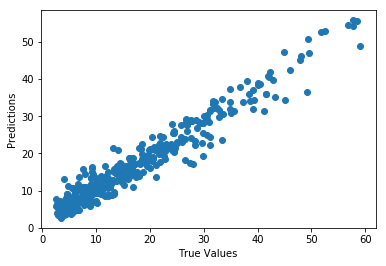

In [324]:
plt.scatter(y_test, gb_model_testpred)
plt.xlabel("True Values")
plt.ylabel("Predictions")

Text(0,0.5,'Deviance')

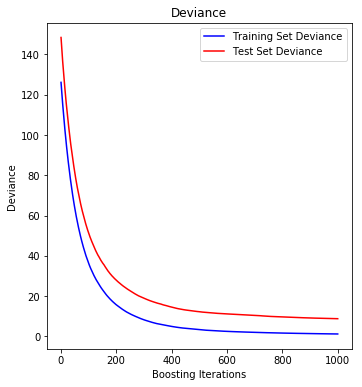

In [325]:
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params_init['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(gb_model_init.staged_predict(X_test)):
    test_score[i] = gb_model_init.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params_init['n_estimators']) + 1, gb_model_init.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params_init['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

In [326]:
test_df = test.drop(['row_id', 'country_code'], axis=1)
test_df.head()

,year,agricultural_land_area,percentage_of_arable_land_equipped_for_irrigation,cereal_yield,droughts_floods_extreme_temps,forest_area,total_land_area,fertility_rate,life_expectancy,rural_population,...,open_defecation,hiv_incidence,rail_lines_density,access_to_electricity,co2_emissions,unemployment_rate,total_labor_force,military_expenditure_share_gdp,proportion_of_seats_held_by_women_in_gov,political_stability
0,2000,5249870.162,46.201886,4703.197577,0.0,1745602.234,9337933.833,1.497540,73.016573,803968662.8,...,2.385915,0.0,0.598120,97.753007,3447594.506,4.577148,722286317.6,1.893098,21.459245,0.0
1,2001,5172561.497,48.147142,4854.514289,0.0,1790669.529,9442897.750,1.522778,73.250410,813678224.6,...,2.296500,0.0,0.596732,94.722265,3464543.815,4.526647,748648576.2,2.054036,21.591386,0.0
2,2002,5217927.005,51.894636,4789.707416,0.0,1822502.130,9257619.329,1.541029,73.925541,785913669.4,...,2.497710,0.0,0.605924,97.010930,3837064.336,4.489518,756936465.2,2.208211,21.492467,0.0
3,2003,5199945.565,52.998392,4897.662347,0.0,1877056.376,9531467.109,1.543971,74.392192,769765156.5,...,2.382243,0.0,0.601028,96.959436,4605549.519,4.228389,751152657.6,2.134894,19.806026,0.0
4,2004,5233883.644,54.289656,5285.977627,0.0,1919141.306,9390524.431,1.543429,74.402535,767923477.7,...,2.278278,0.0,0.609730,98.409175,5337618.231,4.229449,756162567.0,2.076224,20.207631,0.0


In [327]:
gb_model_fintest = gb_model_init.predict(test_df)

In [328]:
submission_gbmodelinit = pd.DataFrame({
        "row_id": test.row_id,
        "prevalence_of_undernourishment": gb_model_fintest
})
submission_gbmodelinit.head()

,row_id,prevalence_of_undernourishment
0,199,11.617764
1,364,17.615914
2,122,14.670960
3,559,12.202754
4,476,8.283730


In [329]:
submission_final = submission_gbmodelinit.sort_values(by='row_id')
submission_final.head()

,row_id,prevalence_of_undernourishment
455,0,5.776211
153,1,7.032017
522,2,10.207950
478,3,21.754078
33,4,30.655991


In [330]:
submission_final.to_csv('sub_gbmodel_1012.csv', index=False)

# Determine important variables using GBM model

In [331]:
X1 = X
y1 = y

In [335]:
feature_names = np.asarray(X.columns.tolist())
feature_names

array(['year', 'agricultural_land_area',
       'percentage_of_arable_land_equipped_for_irrigation',
       'cereal_yield', 'droughts_floods_extreme_temps', 'forest_area',
       'total_land_area', 'fertility_rate', 'life_expectancy',
       'rural_population', 'total_population', 'urban_population',
       'population_growth', 'avg_value_of_food_production',
       'cereal_import_dependency_ratio',
       'food_imports_as_share_of_merch_exports',
       'gross_domestic_product_per_capita_ppp',
       'imports_of_goods_and_services', 'inequality_index',
       'net_oda_received_percent_gni', 'net_oda_received_per_capita',
       'tax_revenue_share_gdp', 'trade_in_services',
       'per_capita_food_production_variability',
       'per_capita_food_supply_variability', 'adult_literacy_rate',
       'school_enrollment_rate_female', 'school_enrollment_rate_total',
       'avg_supply_of_protein_of_animal_origin',
       'caloric_energy_from_cereals_roots_tubers',
       'access_to_improved_s

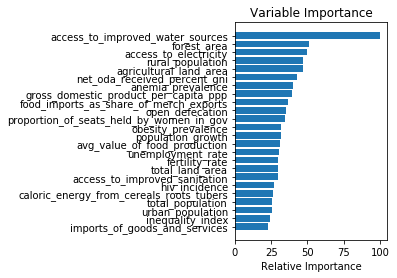

In [336]:
# #############################################################################
# Plot feature importance
feature_importance = gb_model_init.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx[20:].shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx[20:]], align='center')
plt.yticks(pos,feature_names[sorted_idx[20:]])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [337]:
feature_names[sorted_idx[20:]]

array(['imports_of_goods_and_services', 'inequality_index',
       'urban_population', 'total_population',
       'caloric_energy_from_cereals_roots_tubers', 'hiv_incidence',
       'access_to_improved_sanitation', 'total_land_area',
       'fertility_rate', 'unemployment_rate',
       'avg_value_of_food_production', 'population_growth',
       'obesity_prevalence', 'proportion_of_seats_held_by_women_in_gov',
       'open_defecation', 'food_imports_as_share_of_merch_exports',
       'gross_domestic_product_per_capita_ppp', 'anemia_prevalence',
       'net_oda_received_percent_gni', 'agricultural_land_area',
       'rural_population', 'access_to_electricity', 'forest_area',
       'access_to_improved_water_sources'], dtype='<U49')

In [338]:
best_features = feature_names[sorted_idx[20:]].tolist() 

In [339]:
train_df = train[best_features +['prevalence_of_undernourishment'] ]

In [340]:
X = train_df.drop(['prevalence_of_undernourishment'], axis=1)
y = train_df['prevalence_of_undernourishment']

In [341]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(980, 24)
(980,)
(421, 24)
(421,)


In [342]:
# Fit regression model
params_new = {'n_estimators': 1000, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
gb_clf_new = ensemble.GradientBoostingRegressor(**params_new)

In [343]:
gb_model_new = gb_clf_new.fit(X_train, y_train)

In [344]:
gb_model_testpredn = gb_model_new.predict(X_test)
gb_model_trainpredn = gb_model_new.predict(X_train)

In [345]:
print("MSE train:", mean_squared_error(y_train, gb_model_trainpredn), "MSE test:", mean_squared_error(y_test, gb_model_testpredn))
print("RMSE train:", rmse(gb_model_trainpredn, y_train), "RMSE test:", rmse(gb_model_testpredn, y_test))
print("Train Score:", gb_model_new.score(X_train, y_train), "Test Score:", gb_model_new.score(X_test, y_test))

MSE train: 1.7125735347761784 MSE test: 8.740775560183723
RMSE train: 1.3086533287223852 RMSE test: 2.9564802654818667
Train Score: 0.9874623744482603 Test Score: 0.9329089630544519


In [346]:
test_df = test[best_features]
test_df.head()

,imports_of_goods_and_services,inequality_index,urban_population,total_population,caloric_energy_from_cereals_roots_tubers,hiv_incidence,access_to_improved_sanitation,total_land_area,fertility_rate,unemployment_rate,...,open_defecation,food_imports_as_share_of_merch_exports,gross_domestic_product_per_capita_ppp,anemia_prevalence,net_oda_received_percent_gni,agricultural_land_area,rural_population,access_to_electricity,forest_area,access_to_improved_water_sources
0,18.784148,0.0,452194921.9,1.285808e+09,59.815544,0.0,59.758596,9337933.833,1.497540,4.577148,...,2.385915,2.965464,3818.419126,0.0,0.146655,5249870.162,803968662.8,97.753007,1745602.234,80.316724
1,18.374602,0.0,466784392.3,1.266610e+09,58.548711,0.0,60.487245,9442897.750,1.522778,4.526647,...,2.296500,3.006481,4230.251053,0.0,0.112698,5172561.497,813678224.6,94.722265,1790669.529,80.296481
2,20.309716,0.0,500381752.9,1.280765e+09,57.996469,0.0,60.588595,9257619.329,1.541029,4.489518,...,2.497710,2.002731,4573.214575,0.0,0.103160,5217927.005,785913669.4,97.010930,1822502.130,82.655055
3,24.509488,0.0,505694755.3,1.294665e+09,56.126959,0.0,62.195935,9531467.109,1.543971,4.228389,...,2.382243,2.986711,4905.349384,0.0,0.082070,5199945.565,769765156.5,96.959436,1877056.376,82.349781
4,28.483815,0.0,528863680.7,1.284838e+09,57.108720,0.0,63.604538,9390524.431,1.543429,4.229449,...,2.278278,2.037237,5312.097952,0.0,0.087934,5233883.644,767923477.7,98.409175,1919141.306,85.691261


In [352]:
X_train.head()

,imports_of_goods_and_services,inequality_index,urban_population,total_population,caloric_energy_from_cereals_roots_tubers,hiv_incidence,access_to_improved_sanitation,total_land_area,fertility_rate,unemployment_rate,...,open_defecation,food_imports_as_share_of_merch_exports,gross_domestic_product_per_capita_ppp,anemia_prevalence,net_oda_received_percent_gni,agricultural_land_area,rural_population,access_to_electricity,forest_area,access_to_improved_water_sources
379,21.996546,0.000000,1.735145e+06,4.425034e+06,56.270150,0.353125,21.107335,610528.454675,5.187390,6.206086,...,24.168146,31.827218,960.657920,46.107109,10.522192,51700.746638,2.688726e+06,11.414805,219349.378119,68.813817
39,72.043294,0.000000,2.551460e+04,8.952395e+04,28.051758,0.000000,91.111089,443.327084,2.180403,0.000000,...,0.835436,63.449608,22540.182689,24.624268,0.297983,88.770365,6.416570e+04,92.009042,96.084409,98.862604
469,43.105322,0.000000,1.046804e+07,2.029791e+07,67.059932,0.183140,20.634251,323797.918602,5.207662,3.111940,...,28.018059,10.047841,2681.336853,51.009191,3.474636,208082.474349,9.938105e+06,57.611262,102662.513124,79.591107
313,42.103374,43.767355,9.402055e+05,1.718663e+06,60.464844,0.177513,58.179191,10084.383564,5.677714,9.501401,...,2.054285,247.927420,1634.683408,57.767432,13.276764,6053.061063,7.535430e+05,40.812054,4705.453660,90.669566
515,65.363722,0.000000,9.673203e+05,1.371774e+06,34.426945,0.000000,98.200321,41720.650728,1.348735,9.960268,...,0.000000,8.947427,17630.954924,23.012574,0.000000,6889.400813,4.200499e+05,100.120876,22745.319626,98.431460


In [349]:
test_df.shape, test.shape

((616, 24), (616, 46))

In [353]:
gb_model_new_fintest = gb_model_new.predict(test_df)

In [354]:
submission_gbmodel_new = pd.DataFrame({
        "row_id": test.row_id,
        "prevalence_of_undernourishment": gb_model_new_fintest
})
submission_gbmodel_new.head()

,row_id,prevalence_of_undernourishment
0,199,12.831740
1,364,15.822098
2,122,12.674713
3,559,12.349043
4,476,8.332264


In [355]:
submission_final = submission_gbmodel_new.sort_values(by='row_id')
submission_final.head()

,row_id,prevalence_of_undernourishment
455,0,6.705510
153,1,6.488873
522,2,9.974672
478,3,22.184137
33,4,26.818683


In [356]:
submission_final.to_csv('sub_gbmodelnew_1012.csv', index=False)

## Cross validation to optimize the parameters

In [192]:
from sklearn.grid_search import GridSearchCV

D:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [357]:
param_grid = {'learning_rate': [0.01],
              'max_depth': [6],
              'min_samples_leaf': [3, 5]
              }
gb_clf_cv = GridSearchCV(ensemble.GradientBoostingRegressor(n_estimators=1000),
                   param_grid, n_jobs=4, refit=True)

In [358]:
gb_clf_model_cv = gb_clf_cv.fit(X_train, y_train)

In [359]:
%%time
est = ensemble.GradientBoostingRegressor(n_estimators=2000).fit(X_train, y_train)

Wall time: 5.88 s


In [361]:
est_testpred = est.predict(X_test)
est_trainpred = est.predict(X_train)

In [362]:
print("MSE train:", mean_squared_error(y_train, est_trainpred), "MSE test:", mean_squared_error(y_test, est_testpred))
print("RMSE train:", rmse(est_trainpred, y_train), "RMSE test:", rmse(est_testpred, y_test))
print("Train Score:", est.score(X_train, y_train), "Test Score:", est.score(X_test, y_test))

MSE train: 0.0018239718806282634 MSE test: 7.276817559363414
RMSE train: 0.042707983804298966 RMSE test: 2.6975577026939415
Train Score: 0.9999866468353085 Test Score: 0.9441457760401524


In [363]:
est_fintestpred = est.predict(test_df)

In [364]:
submission_ensemble = pd.DataFrame({
        "row_id": test.row_id,
        "prevalence_of_undernourishment": est_fintestpred
})
submission_ensemble.head()

,row_id,prevalence_of_undernourishment
0,199,16.856333
1,364,17.681814
2,122,13.967338
3,559,13.157340
4,476,6.056922


In [365]:
submission_final = submission_ensemble.sort_values(by='row_id')

In [366]:
submission_final.head()

,row_id,prevalence_of_undernourishment
455,0,8.013505
153,1,8.008459
522,2,10.772346
478,3,21.968738
33,4,25.297561


In [367]:
submission_final.to_csv('sub_ens_1012.csv', index=False)

## Random Forest

In [368]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import model_selection

In [369]:
X = X1
y = y1
X.shape, y.shape

((1401, 44), (1401,))

In [372]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [373]:
# Random Forest Regression
rfmodel = RandomForestRegressor(random_state = 42, n_estimators=100, n_jobs=-1)  
rfmodel.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [374]:
# Find feature importance, print it
raw_feature_importance = rfmodel.feature_importances_.tolist()
feature_importance = [round(val * 100.0, 2) for val in raw_feature_importance]
print(feature_importance)

[0.45, 0.87, 1.43, 1.55, 0.01, 1.64, 0.44, 0.51, 0.58, 1.04, 0.67, 5.05, 3.24, 0.87, 0.5, 0.89, 14.34, 0.4, 0.22, 2.81, 0.37, 0.84, 0.51, 0.48, 0.3, 0.05, 0.16, 0.23, 0.44, 0.56, 2.46, 33.89, 1.16, 2.25, 1.46, 0.72, 0.12, 10.91, 0.52, 2.4, 0.4, 0.46, 1.04, 0.78]


In [375]:
rfmodel.feature_importances_

array([4.52425625e-03, 8.69110253e-03, 1.43243809e-02, 1.55138437e-02,
       6.96658811e-05, 1.63998363e-02, 4.44801015e-03, 5.13533551e-03,
       5.76841824e-03, 1.03730242e-02, 6.65104479e-03, 5.05047393e-02,
       3.24265531e-02, 8.68088340e-03, 4.99001174e-03, 8.92595682e-03,
       1.43394256e-01, 4.00586130e-03, 2.15584037e-03, 2.81139682e-02,
       3.71657906e-03, 8.42218410e-03, 5.06733477e-03, 4.84177371e-03,
       3.01351394e-03, 4.96982245e-04, 1.61740848e-03, 2.34043301e-03,
       4.38856942e-03, 5.63144084e-03, 2.45521037e-02, 3.38859723e-01,
       1.16366324e-02, 2.24754436e-02, 1.45684567e-02, 7.21722160e-03,
       1.17703911e-03, 1.09053491e-01, 5.16374602e-03, 2.39884493e-02,
       3.95552328e-03, 4.59662016e-03, 1.03590183e-02, 7.76332357e-03])

In [381]:
print(pd.DataFrame(X.columns, feature_importance))

                                                       0
0.45                                                year
0.87                              agricultural_land_area
1.43   percentage_of_arable_land_equipped_for_irrigation
1.55                                        cereal_yield
0.01                       droughts_floods_extreme_temps
1.64                                         forest_area
0.44                                     total_land_area
0.51                                      fertility_rate
0.58                                     life_expectancy
1.04                                    rural_population
0.67                                    total_population
5.05                                    urban_population
3.24                                   population_growth
0.87                        avg_value_of_food_production
0.50                      cereal_import_dependency_ratio
0.89              food_imports_as_share_of_merch_exports
14.34              gross_domest

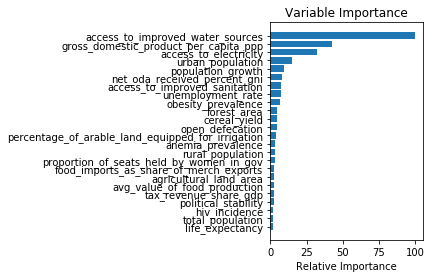

In [383]:
# #############################################################################
feature_names = np.asarray(X.columns.tolist())
# Plot feature importance
feature_importance = rfmodel.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx[20:].shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx[20:]], align='center')
plt.yticks(pos,feature_names[sorted_idx[20:]]) 
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [385]:
rf_trainpred = rfmodel.predict(X_train)
rf_testpred = rfmodel.predict(X_test)

In [386]:
print("MSE train:", mean_squared_error(y_train, rf_trainpred), "MSE test:", mean_squared_error(y_test, rf_testpred))
print("RMSE train:", rmse(rf_trainpred, y_train), "RMSE test:", rmse(rf_testpred, y_test))
print("Train Score:", rfmodel.score(X_train, y_train), "Test Score:", rfmodel.score(X_test, y_test))

MSE train: 1.299489450968314 MSE test: 8.902026322694113
RMSE train: 1.1399515125514397 RMSE test: 2.9836263711621323
Train Score: 0.9905825967767982 Test Score: 0.9299102884397208


In [392]:
rfmodel1 = RandomForestRegressor(n_estimators=10, n_jobs=-1)  
rfmodel1.fit(X_train, y_train)
rfmodel1.score(X_test, y_test)

0.8954837045189556

In [393]:
rfmodel1 = RandomForestRegressor(n_estimators=100, n_jobs=-1)  
rfmodel1.fit(X_train, y_train)
rfmodel1.score(X_test, y_test)

0.9329451681952565

In [394]:
rfmodel1 = RandomForestRegressor(n_estimators=1000, n_jobs=-1)  
rfmodel1.fit(X_train, y_train)
rfmodel1.score(X_test, y_test)

0.9316875981552188

In [397]:
rfmodel1 = RandomForestRegressor(n_estimators=150, n_jobs=-1)  
rfmodel1.fit(X_train, y_train)
rfmodel1.score(X_test, y_test)

0.9328339880042403

In [398]:
rfmodel1 = RandomForestRegressor(n_estimators=150, n_jobs=-1, max_features=10)  
rfmodel1.fit(X_train, y_train)
rfmodel1.score(X_test, y_test)

0.9460287092958138

In [399]:
rfmodel1 = RandomForestRegressor(n_estimators=100, n_jobs=-1, max_features=10)  
rfmodel1.fit(X_train, y_train)
rfmodel1.score(X_test, y_test)

0.9468311759126392

In [400]:
rfmodel1 = RandomForestRegressor(n_estimators=100, n_jobs=-1, max_features=6)  
rfmodel1.fit(X_train, y_train)
rfmodel1.score(X_test, y_test)

0.9389176697332328

In [401]:
rfmodel1 = RandomForestRegressor(n_estimators=100, n_jobs=-1, min_samples_leaf=3, max_features=10)  
rfmodel1.fit(X_train, y_train)
rfmodel1.score(X_test, y_test)

0.9339634546704453

In [402]:
rfmodel1 = RandomForestRegressor(n_estimators=100, n_jobs=-1, min_samples_leaf=5, max_features=10)  
rfmodel1.fit(X_train, y_train)
rfmodel1.score(X_test, y_test)

0.9105407668737227

In [403]:
rfmodel1 = RandomForestRegressor(n_estimators=100, n_jobs=-1, max_features=10, oob_score=True)  
rfmodel1.fit(X_train, y_train)
rfmodel1.score(X_test, y_test)

0.9426402669599191

### AdaBoost

In [405]:
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor

In [407]:
rfcmodel = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score=True,  max_features=10)
adamodel = AdaBoostRegressor(base_estimator=rfcmodel, random_state=10, n_estimators=100)
adamodel.fit(X_train, y_train)
adamodel.score(X_test,y_test)

0.9546486678709388

### Gradient Boosting 

In [409]:
from sklearn.ensemble import GradientBoostingRegressor

In [411]:
gbmodel = GradientBoostingRegressor(learning_rate=0.01, n_estimators=100)
gbmodel.fit(X_train, y_train)
gbmodel.score(X_test, y_test)

0.5888590174722619

In [413]:
from sklearn.grid_search import GridSearchCV
param_grid = {'learning_rate': [0.1, 0.05, 0.02, 0.01],
              'max_depth': [4, 6],
              'min_samples_leaf': [3, 5]
              }
gb_clf_cv = GridSearchCV(GradientBoostingRegressor(n_estimators=100),
                   param_grid, n_jobs=4, refit=True)

In [416]:
gb_clf_cv.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=4,
       param_grid={'learning_rate': [0.1, 0.05, 0.02, 0.01], 'max_depth': [4, 6], 'min_samples_leaf': [3, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [417]:
gb_clf_cv.best_params_

{'learning_rate': 0.1, 'max_depth': 6, 'min_samples_leaf': 3}

In [418]:
gb_clf_cv.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=6, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=3,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [420]:
gb_clf_cv.best_score_

0.9255634350797519

In [423]:
%%time
params_best = {'n_estimators': 100, 'max_depth': 6, 'min_samples_split': 2, 'min_samples_leaf': 3,
          'learning_rate': 0.1, 'loss': 'ls'}
gb_clf_best = GradientBoostingRegressor(**params_best)
gb_clf_best.fit(X_train, y_train)
gb_clf_best.score(X_test, y_test)

Wall time: 1.1 s


In [424]:
print("MSE: %.4f" % mean_squared_error(y_test, gb_clf_best.predict(X_test)))
print("Accuracy Score/ R squared for Train: %.2f" %gb_clf_best.score(X_train, y_train))
print("Accuracy Score/ R squared for Test: %.2f" %gb_clf_best.score(X_test, y_test))

MSE: 6.4216
Accuracy Score/ R squared for Train: 1.00
Accuracy Score/ R squared for Test: 0.95


### XGBoost

In [426]:
import xgboost as xgb

In [427]:
xgb_model = xgb.XGBRegressor()

In [428]:
xgb_model.fit(X_train, y_train)
xgb_model.score(X_test, y_test)

0.9081045991418406

In [429]:
param_grid = {'learning_rate': [0.1, 0.05, 0.02, 0.01],
              'max_depth': [3, 4, 6],
              'n_estimators': [50, 100, 200, 500, 1000]
              }
xgb_clf_cv = GridSearchCV(xgb.XGBRegressor(),param_grid, n_jobs=4, refit=True)

In [430]:
xgb_clf_cv.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=4,
       param_grid={'learning_rate': [0.1, 0.05, 0.02, 0.01], 'max_depth': [3, 4, 6], 'n_estimators': [50, 100, 200, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [431]:
xgb_clf_cv.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 1000}

In [432]:
xgb_clf_cv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [435]:
%%time
params_best = {'n_estimators': 1000, 'max_depth': 4, 'n_jobs': 1}
xgb_clf_best = xgb.XGBRegressor(**params_best)
xgb_clf_best.fit(X_train, y_train)

Wall time: 5.46 s


In [440]:
xgb_clf_best_trainpred = xgb_clf_best.predict(X_train)
xgb_clf_best_testpred = xgb_clf_best.predict(X_test)

In [441]:
print("MSE train:", mean_squared_error(y_train, xgb_clf_best_trainpred), "MSE test:", mean_squared_error(y_test, xgb_clf_best_testpred))
print("RMSE train:", rmse(xgb_clf_best_trainpred, y_train), "RMSE test:", rmse(xgb_clf_best_testpred, y_test))
print("Train Score:", xgb_clf_best.score(X_train, y_train), "Test Score:", xgb_clf_best.score(X_test, y_test))

MSE train: 0.0017128854064941568 MSE test: 6.046637438851075
RMSE train: 0.0413870197827067 RMSE test: 2.4589911424913833
Train Score: 0.999987586715278 Test Score: 0.9523920668580548


In [448]:
X.head()

,year,agricultural_land_area,percentage_of_arable_land_equipped_for_irrigation,cereal_yield,droughts_floods_extreme_temps,forest_area,total_land_area,fertility_rate,life_expectancy,rural_population,...,open_defecation,hiv_incidence,rail_lines_density,access_to_electricity,co2_emissions,unemployment_rate,total_labor_force,military_expenditure_share_gdp,proportion_of_seats_held_by_women_in_gov,political_stability
0,2002,235077.658128,38.558520,935.754365,0.000000,5397.737544,537408.312513,5.928981,60.452227,1.354087e+07,...,28.933529,0.009975,0.0,52.433239,15485.148165,14.788020,4.350521e+06,7.021072,0.698153,-1.393801
1,2000,238889.309650,32.172735,1105.943665,0.000000,5410.890935,528021.974965,6.319679,60.925454,1.331900e+07,...,29.285040,0.010086,0.0,50.617507,14481.940665,12.828682,4.296644e+06,4.973770,0.709801,-1.247080
2,2005,232711.599108,50.326653,709.317439,0.000000,5401.683690,523095.724214,5.513551,62.158812,1.457182e+07,...,27.742174,0.010027,0.0,55.903152,19948.231182,16.056943,4.656077e+06,4.871880,0.297101,-1.447150
3,2003,233024.496951,43.998642,771.615922,0.000000,5516.782480,532875.386108,5.705698,60.486850,1.408342e+07,...,29.027070,0.010026,0.0,53.620719,17615.713352,15.849842,4.471066e+06,6.745127,0.305010,-1.508562
4,2009,234959.016963,55.269463,991.542121,0.098596,5457.803706,527637.164439,4.787286,62.424161,1.551656e+07,...,23.815095,0.009868,0.0,62.752541,24075.616797,14.629417,5.327447e+06,5.596004,0.303312,-2.339758


In [450]:
test_df = test.drop(['row_id', 'country_code'], axis=1)
test_df.head()

,year,agricultural_land_area,percentage_of_arable_land_equipped_for_irrigation,cereal_yield,droughts_floods_extreme_temps,forest_area,total_land_area,fertility_rate,life_expectancy,rural_population,...,open_defecation,hiv_incidence,rail_lines_density,access_to_electricity,co2_emissions,unemployment_rate,total_labor_force,military_expenditure_share_gdp,proportion_of_seats_held_by_women_in_gov,political_stability
0,2000,5249870.162,46.201886,4703.197577,0.0,1745602.234,9337933.833,1.497540,73.016573,803968662.8,...,2.385915,0.0,0.598120,97.753007,3447594.506,4.577148,722286317.6,1.893098,21.459245,0.0
1,2001,5172561.497,48.147142,4854.514289,0.0,1790669.529,9442897.750,1.522778,73.250410,813678224.6,...,2.296500,0.0,0.596732,94.722265,3464543.815,4.526647,748648576.2,2.054036,21.591386,0.0
2,2002,5217927.005,51.894636,4789.707416,0.0,1822502.130,9257619.329,1.541029,73.925541,785913669.4,...,2.497710,0.0,0.605924,97.010930,3837064.336,4.489518,756936465.2,2.208211,21.492467,0.0
3,2003,5199945.565,52.998392,4897.662347,0.0,1877056.376,9531467.109,1.543971,74.392192,769765156.5,...,2.382243,0.0,0.601028,96.959436,4605549.519,4.228389,751152657.6,2.134894,19.806026,0.0
4,2004,5233883.644,54.289656,5285.977627,0.0,1919141.306,9390524.431,1.543429,74.402535,767923477.7,...,2.278278,0.0,0.609730,98.409175,5337618.231,4.229449,756162567.0,2.076224,20.207631,0.0


In [451]:
xgb_clf_best_testpred_fin = xgb_clf_best.predict(test_df)

In [452]:
submission_xgb_clf = pd.DataFrame({
        "row_id": test.row_id,
        "prevalence_of_undernourishment": xgb_clf_best_testpred_fin
})
submission.head()

,row_id,prevalence_of_undernourishment
0,199,13.160223
1,364,17.025789
2,122,12.167908
3,559,12.440564
4,476,10.343034


In [453]:
submission_final = submission_xgb_clf.sort_values(by='row_id')
submission_final.head()

,row_id,prevalence_of_undernourishment
455,0,4.719183
153,1,6.497973
522,2,13.661206
478,3,24.697250
33,4,25.157354


In [454]:
submission_final.to_csv('sub_xgb_clf_1012.csv', index=False)

# Followup...
- do adaboost
- xgb clf 
with selected features and submit